In [71]:
import glob
from pyswmm import Simulation
import pandas as pd
import shutil
import os
from swmmtoolbox import swmmtoolbox
import matplotlib.pyplot as plt

In [107]:
report_key = {'1':'01:00:00',
       '3':'03:00:00',
       '6':'06:00:00',
       '12':'12:00:00',
       '24':'24:00:00'}
sim_type_key = {'ng':'No Green Infrastructure',
                'rb':'Rain Barrel',
                'rb_lid': 'Rain Barrel (LID)',
                'rg': 'Rain Garden'}


In [108]:
one = glob.glob('./1/*.out')
three = glob.glob('./3/*.out')
six = glob.glob('./6/*.out')
twelve = glob.glob('./12/*.out')
twentyfour = glob.glob('./24/*.out')

files = list(zip(one, three, six, twelve, twentyfour))

#### Print Output File Size

In [110]:
for file in files[0]:
    sim_type = file[file.find('/')+1:]
    sim_type = sim_type[:sim_type.find('/')]
    
    size = os.path.getsize(file)
    print(report_key[sim_type], format(size / (1024*1024), '.3f'), 'MB')  # amount of space for one input file
    print(format(size * 144797 / (1024*1024*1024), '.3f'), 'GB\n')  # amount of space for all input files

01:00:00 28.423 MB
4019.067 GB

03:00:00 9.474 MB
1339.705 GB

06:00:00 4.737 MB
669.865 GB

12:00:00 2.369 MB
334.945 GB

24:00:00 1.184 MB
167.485 GB



#### Compare Output

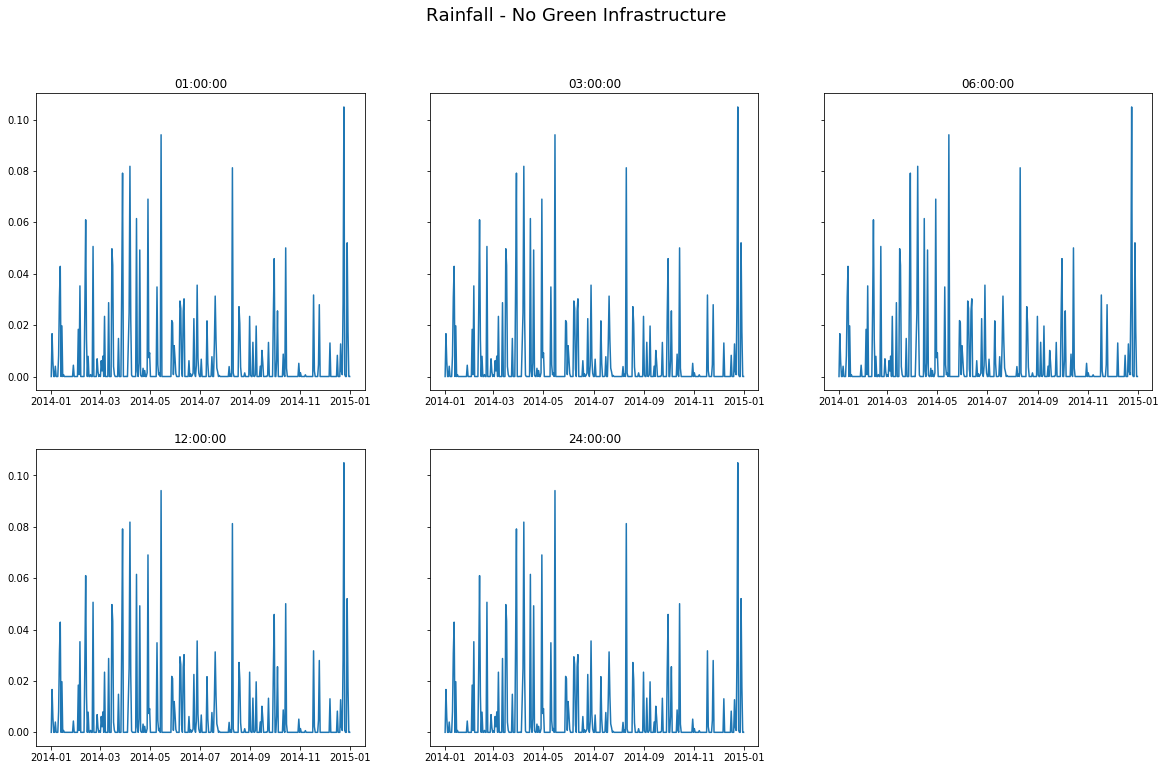

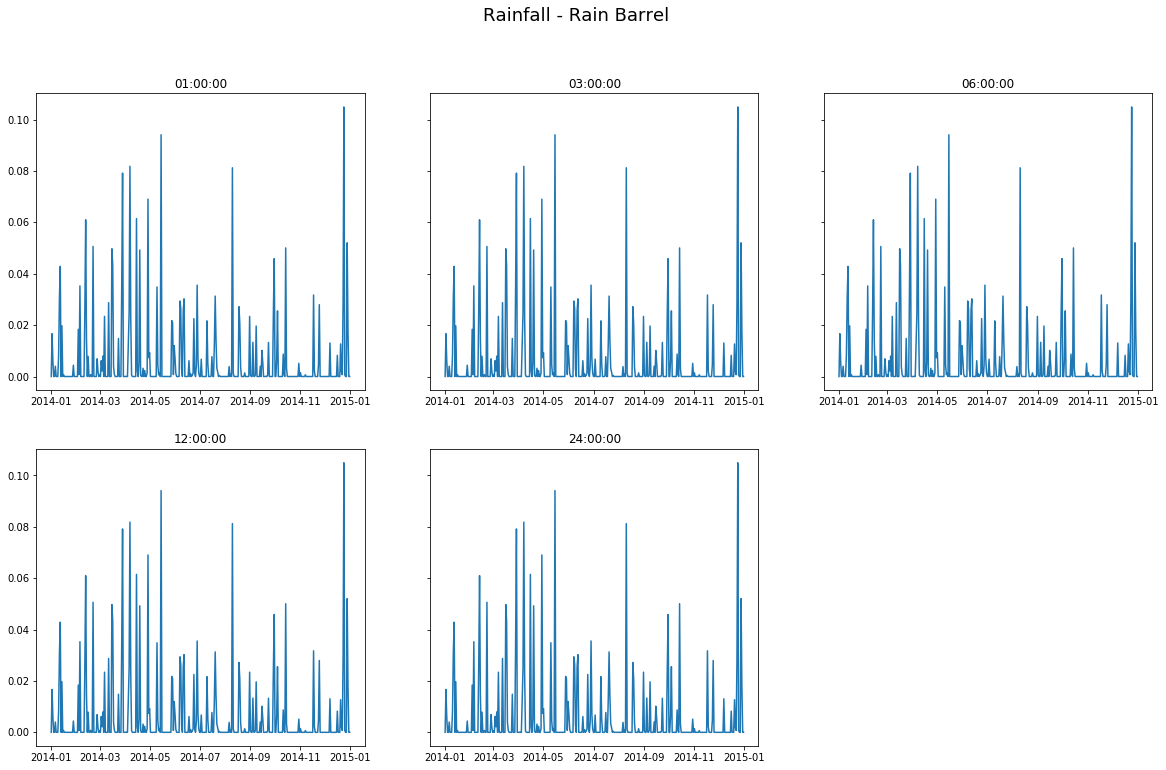

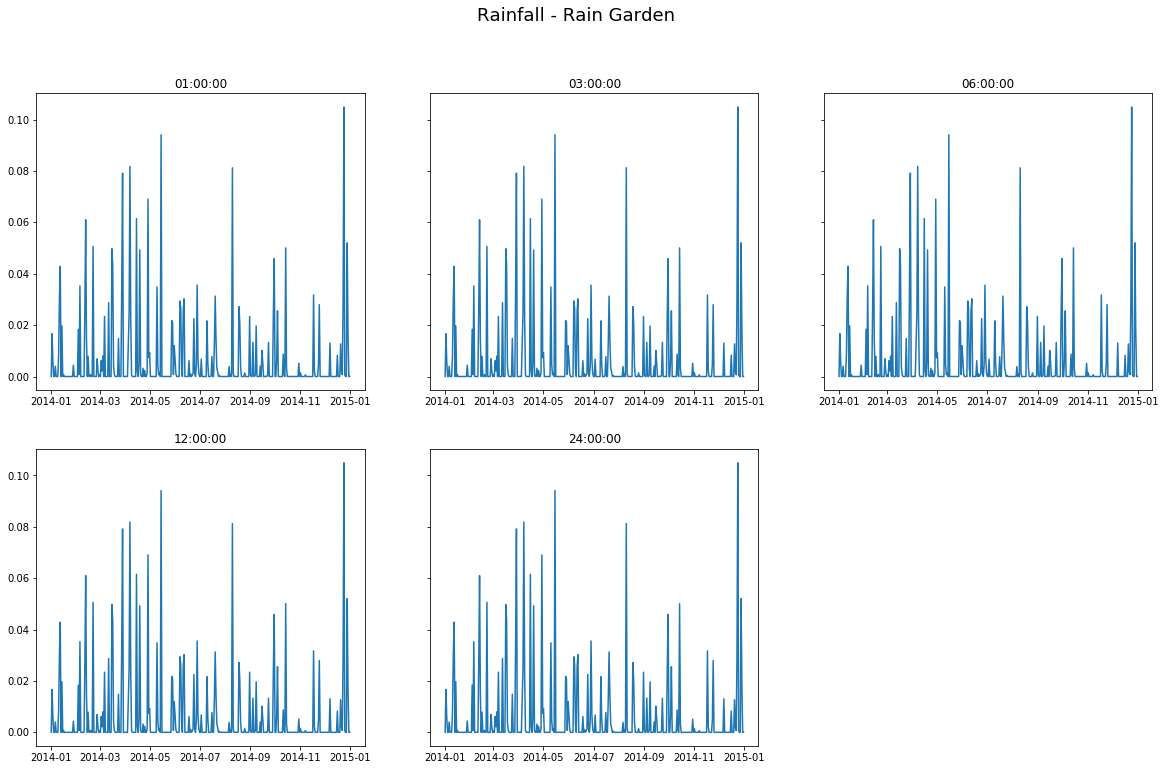

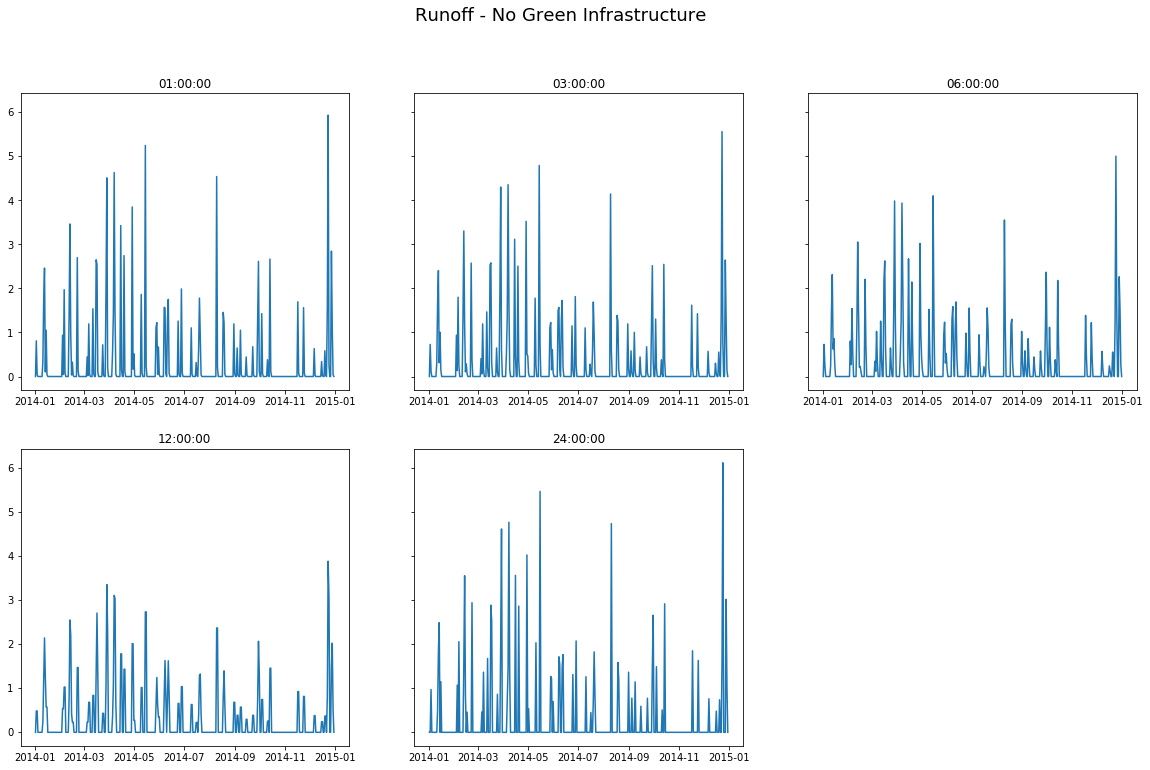

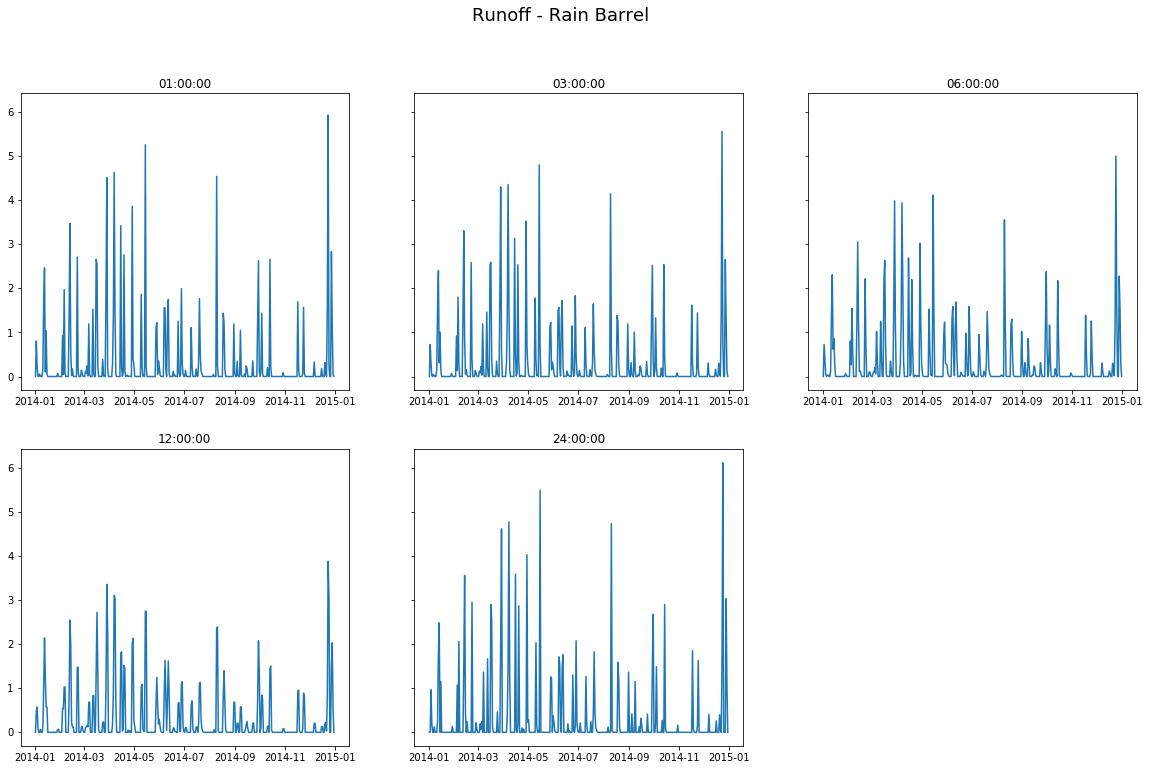

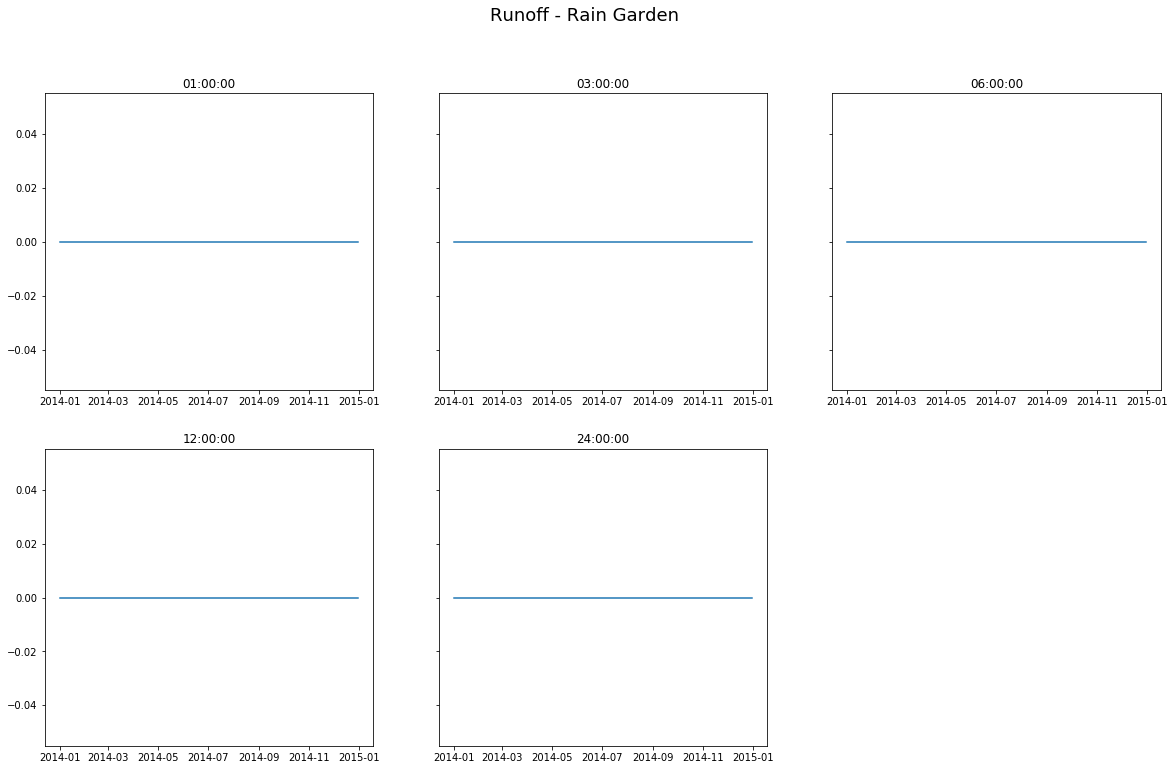

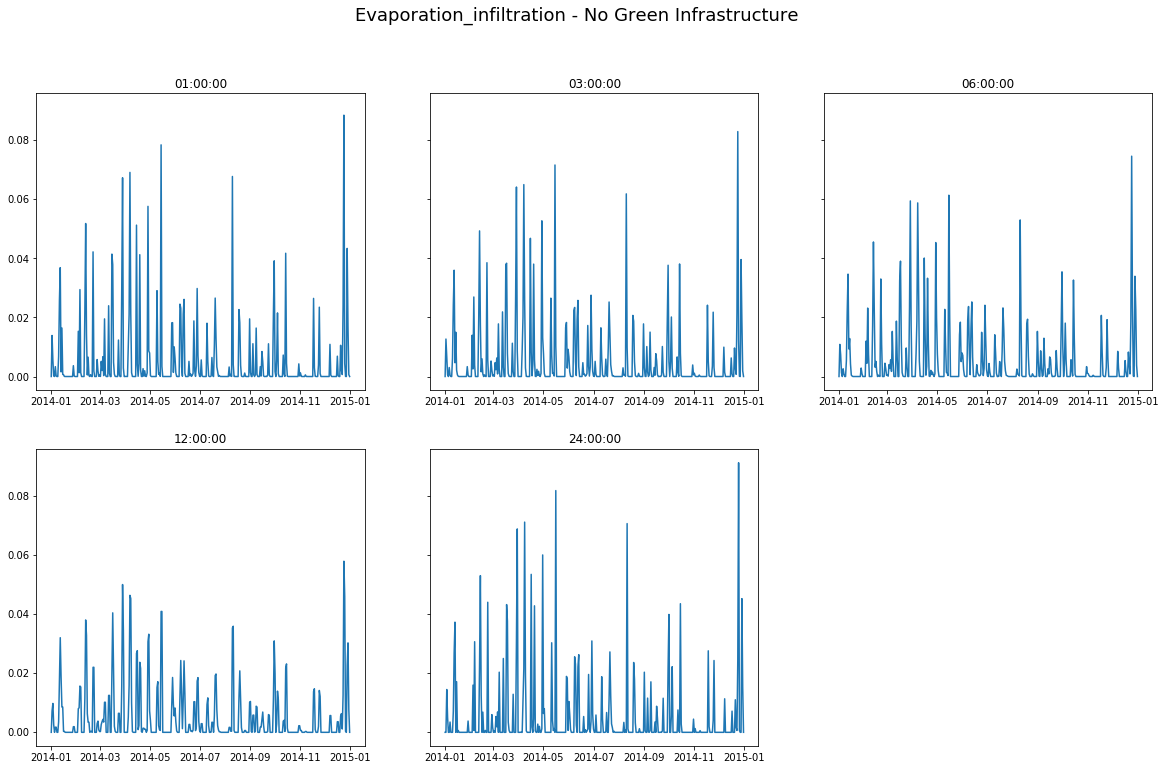

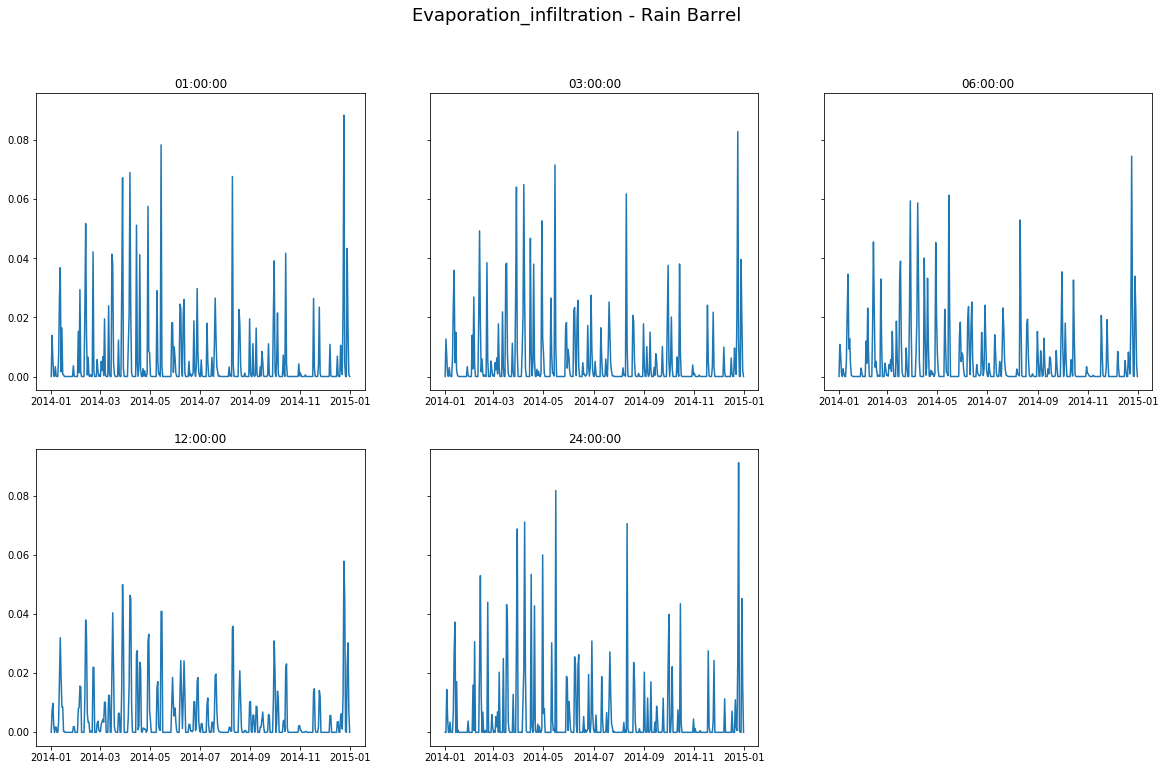

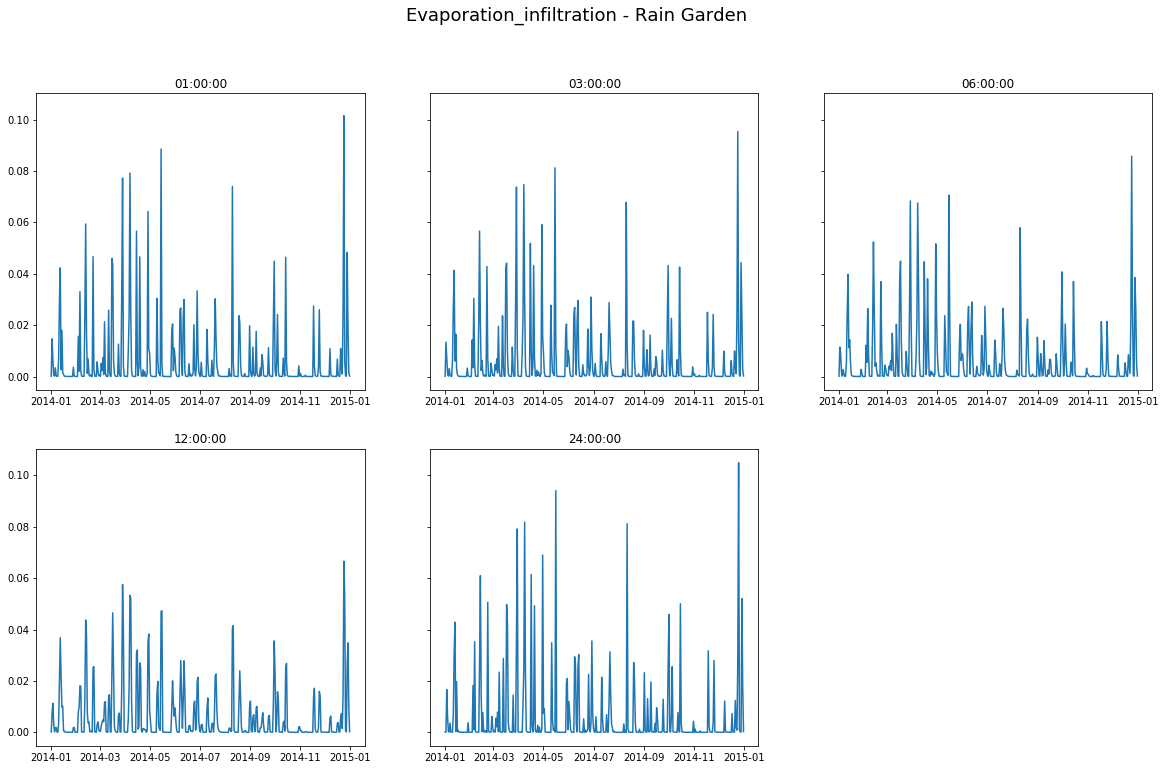

In [118]:
for datatype in ['system,Rainfall,Rainfall', 'system,Runoff,Runoff', 'system,Evaporation_infiltration,Evaporation_infiltration']:
    for sim_type_files in files:
        sim_type = sim_type_files[0][sim_type_files[0].rfind('_')+1:sim_type_files[0].rfind('.')]
        
        fig, ax = plt.subplots(2, 3, figsize=(20,12), sharey=True)    
        fig.suptitle(datatype.split(',')[1] + ' - ' + sim_type_key[sim_type], size='18')

        ax = ax.flatten()

        for (file, num) in zip(sim_type_files, range(5)):
            report_type = file[file.find('/')+1:]
            report_type = report_type[:report_type.find('/')]
            
            
            data = swmmtoolbox.extract(file, datatype).resample('d').mean().iloc[-365:]
            ax[num].plot(data)
            ax[num].set_title(report_key[report_type])

        fig.delaxes(ax[-1])
        plt.savefig('./plots/' + datatype.split(',')[1] + '_' + sim_type + '.svg', dpi=900)
        plt.show()
    
    